In [15]:
#use this to test new functions by loading presets that are done in main.py
#%%
import pandas as pd
import numpy as np
import os
import re
import data_formatting_functions
import data_estimation_functions
import utility_functions
import datetime
import analysis_and_plotting_functions
import plotly.express as px
import plotly.graph_objects as go
#set dir one back
os.chdir(re.split('transport_data_system', os.getcwd())[0]+'/transport_data_system')
file_date = datetime.datetime.now().strftime("%Y%m%d")
FILE_DATE_ID = 'DATE{}'.format(file_date)

INDEX_COLS = ['date',
 'economy',
 'measure',
 'vehicle_type',
 'unit',
 'medium',
 'transport_type',
 'drive',
 'fuel',
 'frequency',
 'scope']

EARLIEST_DATE="2010-01-01"
LATEST_DATE='2023-01-01'


previous_FILE_DATE_ID ='DATE20230408'
FILE_DATE_ID = 'DATE20230408'#'DATE20230331'

paths_dict = utility_functions.setup_paths_dict(FILE_DATE_ID,INDEX_COLS, EARLIEST_DATE, LATEST_DATE,previous_FILE_DATE_ID)

df = pd.read_pickle(paths_dict['final_combined_data_not_rescaled'])
plotting=False
#%%
import logging
logger = logging.getLogger(__name__)

#%%s
#USE THIS FOR TESTING DURING DEBUGGPING BY LOADING IN SAVED PICKLES
# all_combined_data.to_pickle('x.pkl')
#load x.pkl
x = pd.read_pickle('x.pkl')

#find na's
x.isna().sum()
#find nones
x.isnull().sum()



#UNIT COL IS NA. SEE WHAT IS GOING ON
x[x['unit'].isna()]
# %%

combined_data_concordance = pd.read_pickle(paths_dict['previous_combined_data_concordance'])
combined_data = pd.read_pickle(paths_dict['previous_combined_data'])


In [16]:
combined_data.columns

Index(['date', 'economy', 'measure', 'vehicle_type', 'unit', 'medium',
       'transport_type', 'drive', 'frequency', 'fuel', 'comment', 'scope',
       'dataset', 'value'],
      dtype='object')

In [17]:
combined_data_concordance[combined_data_concordance.dataset_selection_method.isna()]


,date,economy,measure,vehicle_type,unit,medium,transport_type,drive,fuel,frequency,scope,potential_datapoints,num_datapoints,dataset,value,dataset_selection_method,comment
0,2010,01_AUS,activity,all,passenger_km_or_freight_tonne_km,air,freight,all,all,yearly,national,"[ato $ country_official_statistics, ato $ worl...",2,None,None,None,None
2,2010,01_AUS,activity,all,passenger_km_or_freight_tonne_km,rail,freight,all,all,yearly,national,"[ato $ country_official_statistics, ato $ inte...",2,None,None,None,None
4,2010,01_AUS,activity,all,passenger_km_or_freight_tonne_km,ship,freight,all,all,yearly,national,[ato $ country_official_statistics],1,None,None,None,None
1,2010,01_AUS,activity,all,passenger_km_or_freight_tonne_km,air,passenger,all,all,yearly,"national,_international",[ato $ country_official_statistics],1,None,None,None,None
3,2010,01_AUS,activity,all,passenger_km_or_freight_tonne_km,rail,passenger,all,all,yearly,national,"[ato $ country_official_statistics, ato $ inte...",3,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20129,2022,21_VN,turnover_rate,bus,%,road,passenger,phev,all,yearly,national,[manually_inputted_data $ guess],1,None,None,None,None
20132,2022,21_VN,turnover_rate,ldv,%,road,passenger,bev,all,yearly,national,[manually_inputted_data $ guess],1,None,None,None,None
20133,2022,21_VN,turnover_rate,ldv,%,road,passenger,fcev,all,yearly,national,[manually_inputted_data $ guess],1,None,None,None,None
20134,2022,21_VN,turnover_rate,ldv,%,road,passenger,ice,all,yearly,national,[manually_inputted_data $ guess],1,None,None,None,None


In [18]:
import pandas as pd

a = pd.read_csv('intermediate_data/manually_inputted_data_cleaned_roadDATE20230409.csv')

In [19]:
'potential_datapoints', 'num_datapoints'

('potential_datapoints', 'num_datapoints')

In [20]:
a

,Medium,Transport Type,Vehicle Type,Drive,Date,Economy,Frequency,Measure,Unit,Dataset,Scope,Comments,Fuel,Source,Value
0,road,passenger,2w,bev,2010-12-31,01_AUS,Yearly,New_vehicle_efficiency,Km_per_PJ,avg_eff_no_outliers,National,no_comment,All,transport_data_system_9th,2.549002e+09
1,road,passenger,2w,bev,2011-12-31,01_AUS,Yearly,New_vehicle_efficiency,Km_per_PJ,avg_eff_no_outliers,National,no_comment,All,transport_data_system_9th,2.549002e+09
2,road,passenger,2w,bev,2012-12-31,01_AUS,Yearly,New_vehicle_efficiency,Km_per_PJ,avg_eff_no_outliers,National,no_comment,All,transport_data_system_9th,2.549002e+09
3,road,passenger,2w,bev,2013-12-31,01_AUS,Yearly,New_vehicle_efficiency,Km_per_PJ,avg_eff_no_outliers,National,no_comment,All,transport_data_system_9th,2.549002e+09
4,road,passenger,2w,bev,2014-12-31,01_AUS,Yearly,New_vehicle_efficiency,Km_per_PJ,avg_eff_no_outliers,National,no_comment,All,transport_data_system_9th,2.549002e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53797,road,passenger,ldv,ice,2023-12-31,21_VN,Yearly,Efficiency,Km_per_PJ,avg_eff_no_outliers,National,no_comment,All,transport_data_system_9th,2.374463e+08
53798,road,passenger,ldv,ice,2023-12-31,21_VN,Yearly,Mileage,km_per_stock,Manually_inputted_data,National,no_comment,All,guess,1.500000e+04
53799,road,passenger,ldv,ice,2023-12-31,21_VN,Yearly,New_vehicle_efficiency,Km_per_PJ,avg_eff_no_outliers,National,no_comment,All,transport_data_system_9th,2.374463e+08
53800,road,passenger,ldv,ice,2023-12-31,21_VN,Yearly,Occupancy_or_load,Passengers_or_tonnes,Manually_inputted_data,National,no_comment,All,guess,1.500000e+00


<Axes: xlabel='date', ylabel='value'>

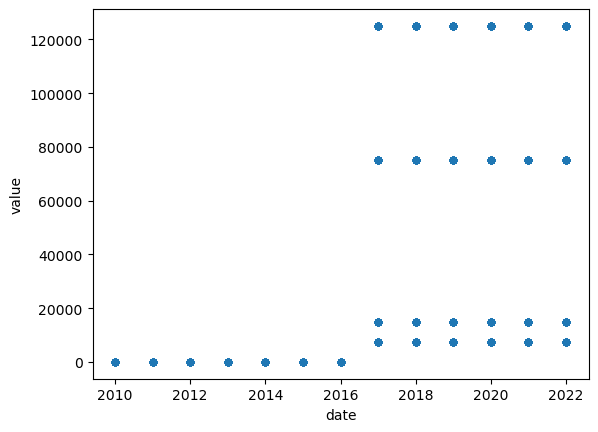

In [21]:
#find why combined_data is ending up with weird mileage data for pre 2017
combined_data[combined_data.measure=='mileage'].plot(x='date',y='value',kind='scatter')

/tmp/ipykernel_810/49656973.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combined_data[combined_data.measure=='mileage'].groupby('date').mean().reset_index().plot(x='date',y='value',kind='scatter')


<Axes: xlabel='date', ylabel='value'>

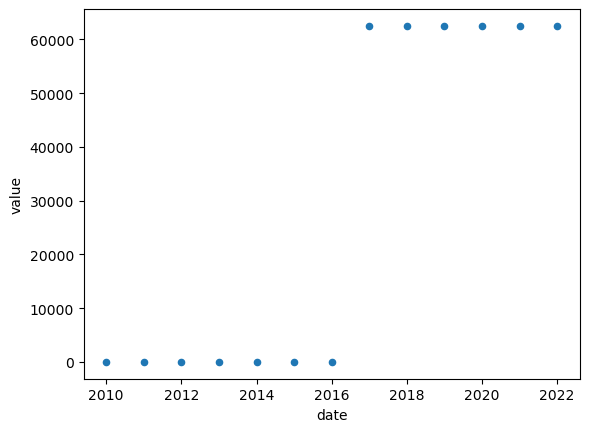

In [22]:
#calc mean by year
combined_data[combined_data.measure=='mileage'].groupby('date').mean().reset_index().plot(x='date',y='value',kind='scatter')


In [23]:
combined_data_concordance.loc[combined_data_concordance['dataset'].str.contains('%#%'), 'dataset']

KeyError: "None of [Index([None, None, None, None, None, None, None, None, None, None,\n       ...\n       None, None, None, None, None, None, None, None, None, None],\n      dtype='object', length=20136)] are in the [index]"

In [24]:
combined_data_concordance['dataset']

0        None
2        None
4        None
1        None
3        None
         ... 
20129    None
20132    None
20133    None
20134    None
20135    None
Name: dataset, Length: 20136, dtype: object

In [31]:
combined_data_concordance.loc[combined_data_concordance['dataset'].str.contains('%#%',na=False), 'dataset'].str.split('%#%').str[1]

10       a
5        a
7        a
12       a
28       a
        ..
20121    a
20130    a
20125    a
20127    a
20132    a
Name: dataset, Length: 5768, dtype: object

In [28]:
#find the daata with %#% in it while avoiding ValueError: Cannot mask with non-boolean array containing NA / NaN values
combined_data_concordance.loc[combined_data_concordance['dataset'].str.contains('%#%',na=False), 'dataset']

10       x%#%a
5        x%#%a
7        x%#%a
12       x%#%a
28       x%#%a
         ...  
20121    x%#%a
20130    x%#%a
20125    x%#%a
20127    x%#%a
20132    x%#%a
Name: dataset, Length: 5768, dtype: object

In [30]:
combined_data_concordance['dataset'].apply(lambda x: x.split('%#%',na=False)[-1])

AttributeError: 'NoneType' object has no attribute 'split'